In [106]:
import matplotlib.pyplot as plt
import numpy as np

In [107]:
# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
# Data Preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

載入資料集--cifar10

In [108]:
(x_train, y_train0), (x_test, y_test0) = datasets.cifar10.load_data()

In [109]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [110]:
# Load CIFAR 10
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

看看資料庫

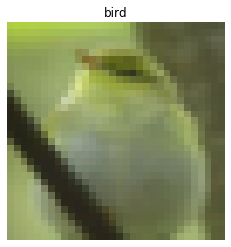

In [111]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

建立model1

In [112]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'),
           MaxPool2D(),
           Conv2D(128, (3, 3), padding='same', activation='relu'),
           MaxPool2D(),
           Conv2D(256, (3, 3), padding='same', activation='relu'),
           GlobalAveragePooling2D()]

FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [113]:
model1 = Sequential(CNN_layers+FC_layers)
model1.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d_25  (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)             

編譯模型

In [114]:
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

訓練model1

In [115]:
model1.fit(x_train, y_train, batch_size=32, epochs=3,validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 264s 5ms/sample - loss: 1.5872 - categorical_accuracy: 0.4546 - val_loss: 1.1956 - val_categorical_accuracy: 0.5745
Epoch 2/3
50000/50000 [==============================] - 205s 4ms/sample - loss: 1.0727 - categorical_accuracy: 0.6210 - val_loss: 0.9996 - val_categorical_accuracy: 0.6382
Epoch 3/3
50000/50000 [==============================] - 206s 4ms/sample - loss: 0.8827 - categorical_accuracy: 0.6910 - val_loss: 0.8479 - val_categorical_accuracy: 0.7033


In [116]:
(u_train, v_train), (u_test, v_test) = fashion_mnist.load_data()

In [117]:
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [118]:
u_train = u_train.reshape(60000, 28, 28, 1) / 255
u_test = u_test.reshape(10000, 28, 28, 1) / 255

In [119]:
from tensorflow.keras.utils import to_categorical

In [120]:
v_train = to_categorical(v_train, 10)
v_test = to_categorical(v_test, 10)

In [123]:
CNN_layers_2= [Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
              MaxPool2D(),
              Conv2D(32, (3, 3), padding='same', activation='relu'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu'),
              GlobalAveragePooling2D()]
FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [127]:
model2 = Sequential(CNN_layers_2+FC_layers)
model2.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
global_average_pooling2d_27  (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)             

In [128]:
for layer in FC_layers:
    layer.trainable = False

In [129]:
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

訓練model2

In [131]:
model2.fit(u_train, v_train, batch_size=32, epochs=10,validation_data=(u_test, v_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 52s 858us/sample - loss: 0.5287 - categorical_accuracy: 0.8128 - val_loss: 0.5156 - val_categorical_accuracy: 0.8202
Epoch 2/10
60000/60000 [==============================] - 37s 624us/sample - loss: 0.4922 - categorical_accuracy: 0.8258 - val_loss: 0.4835 - val_categorical_accuracy: 0.8291
Epoch 3/10
60000/60000 [==============================] - 39s 646us/sample - loss: 0.4639 - categorical_accuracy: 0.8367 - val_loss: 0.5117 - val_categorical_accuracy: 0.8174
Epoch 4/10
60000/60000 [==============================] - 37s 620us/sample - loss: 0.4405 - categorical_accuracy: 0.8449 - val_loss: 0.4524 - val_categorical_accuracy: 0.8408
Epoch 5/10
60000/60000 [==============================] - 38s 640us/sample - loss: 0.4229 - categorical_accuracy: 0.8505 - val_loss: 0.4647 - val_categorical_accuracy: 0.8368
Epoch 6/10
60000/60000 [==============================] - 38s 635us/sample 

In [134]:
score_train = model2.evaluate(u_train, v_train)
score_test = model2.evaluate(u_test, v_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 2s 237us/sample - loss: 0.3948 - categorical_accuracy: 0.8546
Train Accuracy: 87.12499737739563
Test Accuracy: 85.46000123023987
